In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 指定gpu设备
import os
# os.environ['CUDA_VISIBLE_DEVICES'] ="0" # gpu
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # cpu

In [2]:
import shutil
import numpy as np

In [3]:
original_dataset_dir = 'kaggle-dogs-vs-cats/kaggle_original_train_data'
print('total training images:', len(os.listdir(original_dataset_dir)))

total training images: 25000


In [4]:
def mymkdir(path):
    if not os.path.isdir(path):
        os.mkdir(path)

In [5]:
base_dir = 'kaggle-dogs-vs-cats/cats_and_dogs_small'
mymkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
mymkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
mymkdir(test_dir)
validation_dir = os.path.join(base_dir, 'validation')
mymkdir(validation_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
mymkdir(train_cats_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
mymkdir(test_cats_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
mymkdir(validation_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
mymkdir(train_dogs_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
mymkdir(test_dogs_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
mymkdir(validation_dogs_dir)

In [6]:
def copy_dataset(src_dir, dest_dir, start, end, class_name):
    rule = class_name + '.{}.jpg'
    frames = [rule.format(i) for i in range(start, end)]
    for fname in frames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)

In [7]:
copy_dataset(original_dataset_dir, train_cats_dir, 0, 1000, 'cat')
copy_dataset(original_dataset_dir, validation_cats_dir, 1000, 1500, 'cat')
copy_dataset(original_dataset_dir, test_cats_dir, 1500, 2000, 'cat')

copy_dataset(original_dataset_dir, train_dogs_dir, 0, 1000, 'dog')
copy_dataset(original_dataset_dir, validation_dogs_dir, 1000, 1500, 'dog')
copy_dataset(original_dataset_dir, test_dogs_dir, 1500, 2000, 'dog')

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from PIL import Image, ImageDraw, ImageFont, ImageFilter

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
# gpu
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 17s 167ms/step - loss: 0.6903 - acc: 0.5375 - val_loss: 0.6639 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 39s 392ms/step - loss: 0.6573 - acc: 0.6135 - val_loss: 0.6025 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 49s 491ms/step - loss: 0.6066 - acc: 0.6605 - val_loss: 0.6353 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 39s 388ms/step - loss: 0.5706 - acc: 0.7060 - val_loss: 0.4782 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5425 - acc: 0.7315 - val_loss: 0.5741 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 19s 189ms/step - loss: 0.5139 - acc: 0.7400 - val_loss: 0.5890 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4942 - acc: 0.7540 - val_loss: 0.5698 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [12]:
# cpu 训练耗时是用gpu的3倍
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 70s 697ms/step - loss: 0.6898 - acc: 0.5330 - val_loss: 0.6750 - val_acc: 0.6090
Epoch 2/30
100/100 [==============================] - 74s 744ms/step - loss: 0.6709 - acc: 0.5955 - val_loss: 0.7318 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 82s 822ms/step - loss: 0.6363 - acc: 0.6440 - val_loss: 0.6056 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 81s 808ms/step - loss: 0.5968 - acc: 0.6755 - val_loss: 0.5154 - val_acc: 0.5820
Epoch 5/30
100/100 [==============================] - 75s 751ms/step - loss: 0.5504 - acc: 0.7160 - val_loss: 0.5487 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 80s 796ms/step - loss: 0.5115 - acc: 0.7450 - val_loss: 0.6632 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 82s 815ms/step - loss: 0.4820 - acc: 0.7690 - val_loss: 0.5559 - val_acc: 0.6880
Epoch 8/30
100/100 [==============================] - 

In [13]:
model.save('cats_and_dogs_small_1_cpu.h5')

In [14]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

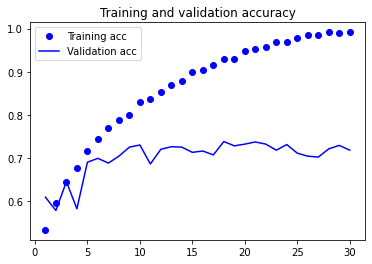

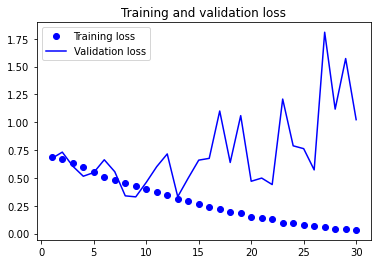

In [15]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
 
epochs = range(1, len(acc) + 1) 
 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
 
plt.figure() 
 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()